## 한글 텍스트 전처리

In [6]:
import re
import konlpy
import pandas as pd

In [2]:
#'과제_뉴스 기사' 텍스트 불러오고 string으로 읽기
with open(r'./과제_뉴스 기사.txt', encoding='utf-8') as f:
    text = f.readlines()
    
text

['대출금리도 2.72% 사상최저\n',
 '\n',
 '\n',
 '\n',
 '\t\t\t\t은행 예금에 사상 첫 \'0%대 금리\' 시대가 열렸다. 1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다. 은행 예·적금이 돈을 불리는 수단이 아닌, 있는 돈을 그저 안전하게 보관하는 \'금고\'에 그치는 시대가 된 셈이다. 이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다. "이러니 주식·부동산으로 돈이 안 쏠릴 수 없다"는 말이 나온다.\n',
 '\n',
 "한국은행이 31일 발표한 '6월 중 금융기관 가중평균금리'에 따르면, 지난달 은행 예금 금리는 0.88%로 전월 대비 0.19%포인트 내렸다. 역대 처음으로 '1%대' 금리가 깨진 것이다. 은행권의 정기예금 상품 67.1%는 금리 수준이 0%대였다. 코로나 사태 이후 한은이 기준금리를 사상 최저인 0.5%까지 끌어내리면서, 예금 금리 역시 덩달아 내려간 것이다.\n",
 '\n',
 '대출 금리도 일제히 역대 최저 수준으로 떨어졌다. 은행권의 대출 금리는 평균 2.72%로 역대 최저로 집계됐다. 가계 대출 금리는 2.67%였다. 신용대출(3.33→2.93%), 주택담보대출(2.52→2.49%) 모두 내렸다. 특히 신용대출 금리는 전월 대비 0.4%포인트나 떨어졌다. 신용대출 금리가 2%대로 내려온 건 이번이 처음이다.\n',
 '\n',
 '신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다.\n',
 '\n',
 '한은 관계자는 "6·17 부동산 대책을 전후로 주택 매매·전세 거래가 증가했는데, 주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편"이라며 "신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다"고 설명했다.\n',
 '\n',
 "시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다. 한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억

In [4]:
#빈 줄과 양 끝단의 공백 제거
text_strip = list([i.strip() for i in text if i != '\n'])
text_join = ' '.join(text_strip)
text_join

'대출금리도 2.72% 사상최저 은행 예금에 사상 첫 \'0%대 금리\' 시대가 열렸다. 1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다. 은행 예·적금이 돈을 불리는 수단이 아닌, 있는 돈을 그저 안전하게 보관하는 \'금고\'에 그치는 시대가 된 셈이다. 이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다. "이러니 주식·부동산으로 돈이 안 쏠릴 수 없다"는 말이 나온다. 한국은행이 31일 발표한 \'6월 중 금융기관 가중평균금리\'에 따르면, 지난달 은행 예금 금리는 0.88%로 전월 대비 0.19%포인트 내렸다. 역대 처음으로 \'1%대\' 금리가 깨진 것이다. 은행권의 정기예금 상품 67.1%는 금리 수준이 0%대였다. 코로나 사태 이후 한은이 기준금리를 사상 최저인 0.5%까지 끌어내리면서, 예금 금리 역시 덩달아 내려간 것이다. 대출 금리도 일제히 역대 최저 수준으로 떨어졌다. 은행권의 대출 금리는 평균 2.72%로 역대 최저로 집계됐다. 가계 대출 금리는 2.67%였다. 신용대출(3.33→2.93%), 주택담보대출(2.52→2.49%) 모두 내렸다. 특히 신용대출 금리는 전월 대비 0.4%포인트나 떨어졌다. 신용대출 금리가 2%대로 내려온 건 이번이 처음이다. 신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다. 한은 관계자는 "6·17 부동산 대책을 전후로 주택 매매·전세 거래가 증가했는데, 주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편"이라며 "신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다"고 설명했다. 시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다. 한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억원 증가한 928조9000억원에 달했다. 역대 6월 최대 증가 폭이다. 더 늦기 전에 집이나 주식을 사자는 \'패닉 바잉\' 수요가 가계대출 증가의 주범이라는 해석이 나온다.

In [7]:
#특수문자 제거
filtered_content = re.sub(r'[^\d\s\w]', ' ', text_join)

print(filtered_content)

대출금리도 2 72  사상최저 은행 예금에 사상 첫  0 대 금리  시대가 열렸다  1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다  은행 예 적금이 돈을 불리는 수단이 아닌  있는 돈을 그저 안전하게 보관하는  금고 에 그치는 시대가 된 셈이다  이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다   이러니 주식 부동산으로 돈이 안 쏠릴 수 없다 는 말이 나온다  한국은행이 31일 발표한  6월 중 금융기관 가중평균금리 에 따르면  지난달 은행 예금 금리는 0 88 로 전월 대비 0 19 포인트 내렸다  역대 처음으로  1 대  금리가 깨진 것이다  은행권의 정기예금 상품 67 1 는 금리 수준이 0 대였다  코로나 사태 이후 한은이 기준금리를 사상 최저인 0 5 까지 끌어내리면서  예금 금리 역시 덩달아 내려간 것이다  대출 금리도 일제히 역대 최저 수준으로 떨어졌다  은행권의 대출 금리는 평균 2 72 로 역대 최저로 집계됐다  가계 대출 금리는 2 67 였다  신용대출 3 33 2 93    주택담보대출 2 52 2 49   모두 내렸다  특히 신용대출 금리는 전월 대비 0 4 포인트나 떨어졌다  신용대출 금리가 2 대로 내려온 건 이번이 처음이다  신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다  한은 관계자는  6 17 부동산 대책을 전후로 주택 매매 전세 거래가 증가했는데  주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편 이라며  신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다 고 설명했다  시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다  한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억원 증가한 928조9000억원에 달했다  역대 6월 최대 증가 폭이다  더 늦기 전에 집이나 주식을 사자는  패닉 바잉  수요가 가계대출 증가의 주범이라는 해석이 나온다  워낙 금리가 낮기 

In [42]:
#원하는 형태소 분석기로 pos 태깅, morphs, 그리고 명사만 모아놓은 변수 만들어보기
komoran = konlpy.tag.Komoran()
komoran_pos = komoran.pos(filtered_content)
print(komoran_pos)

[('대출금', 'NNG'), ('리도', 'NNP'), ('2', 'SN'), ('72', 'SN'), ('사상', 'NNG'), ('최저', 'NNG'), ('은행', 'NNG'), ('예금', 'NNG'), ('에', 'JKB'), ('사상', 'NNG'), ('첫', 'MM'), ('0', 'SN'), ('대', 'NNB'), ('금리', 'NNG'), ('시대', 'NNG'), ('가', 'JKS'), ('열리', 'VV'), ('었', 'EP'), ('다', 'EC'), ('1', 'SN'), ('억', 'NR'), ('원', 'NNB'), ('을', 'JKO'), ('은행', 'NNG'), ('에', 'JKB'), ('예금', 'NNG'), ('하', 'XSV'), ('아', 'EC'), ('보', 'VX'), ('았', 'EP'), ('자', 'EC'), ('연간', 'NNG'), ('100', 'SN'), ('만원', 'NNP'), ('받', 'VV'), ('기', 'ETN'), ('도', 'JX'), ('어렵', 'VA'), ('다는', 'ETM'), ('얘기', 'NNG'), ('다', 'JX'), ('은행', 'NNG'), ('예', 'NNG'), ('적금', 'NNP'), ('이', 'JKS'), ('돈', 'NNG'), ('을', 'JKO'), ('불리', 'VV'), ('는', 'ETM'), ('수단', 'NNG'), ('이', 'JKS'), ('아니', 'VCN'), ('ㄴ', 'ETM'), ('있', 'VV'), ('는', 'ETM'), ('돈', 'NNG'), ('을', 'JKO'), ('그저', 'MAG'), ('안전', 'NNG'), ('하', 'XSV'), ('게', 'EC'), ('보관', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('금고', 'NNP'), ('에', 'JKB'), ('그치', 'VV'), ('는', 'ETM'), ('시대', 'NNG'), ('가', 'JKS'), ('되', 'VV

In [9]:
komoran.morphs(filtered_content)

['대출금',
 '리도',
 '2',
 '72',
 '사상',
 '최저',
 '은행',
 '예금',
 '에',
 '사상',
 '첫',
 '0',
 '대',
 '금리',
 '시대',
 '가',
 '열리',
 '었',
 '다',
 '1',
 '억',
 '원',
 '을',
 '은행',
 '에',
 '예금',
 '하',
 '아',
 '보',
 '았',
 '자',
 '연간',
 '100',
 '만원',
 '받',
 '기',
 '도',
 '어렵',
 '다는',
 '얘기',
 '다',
 '은행',
 '예',
 '적금',
 '이',
 '돈',
 '을',
 '불리',
 '는',
 '수단',
 '이',
 '아니',
 'ㄴ',
 '있',
 '는',
 '돈',
 '을',
 '그저',
 '안전',
 '하',
 '게',
 '보관',
 '하',
 '는',
 '금고',
 '에',
 '그치',
 '는',
 '시대',
 '가',
 '되',
 'ㄴ',
 '셈',
 '이',
 '다',
 '이',
 '와',
 '더불',
 '어',
 '대출',
 '금리',
 '는',
 '역대',
 '최저',
 '기록',
 '을',
 '갈',
 '아',
 '치우',
 '었',
 '다',
 '이렇',
 '니',
 '주식',
 '부동산',
 '으로',
 '돈',
 '이',
 '안',
 '쏠리',
 'ㄹ',
 '수',
 '없',
 '다',
 '늘',
 'ㄴ',
 '말',
 '이',
 '나오',
 'ㄴ다',
 '한국은행',
 '이',
 '31',
 '일',
 '발표',
 '하',
 'ㄴ',
 '6월',
 '중',
 '금융',
 '기관',
 '가중',
 '평균',
 '금리',
 '에',
 '따르',
 '면',
 '지난달',
 '은행',
 '예금',
 '금리',
 '는',
 '0',
 '88',
 '로',
 '전월',
 '대비',
 '0',
 '19',
 '포인트',
 '내리',
 '었',
 '다',
 '역대',
 '처음',
 '으로',
 '1',
 '대',
 '금리',
 '가',
 '깨지',
 'ㄴ',
 '것',
 '이',


In [10]:
print(komoran.nouns(filtered_content))
komoran_nouns = komoran.nouns(filtered_content)

['대출금', '리도', '사상', '최저', '은행', '예금', '사상', '대', '금리', '시대', '원', '은행', '예금', '연간', '만원', '얘기', '은행', '예', '적금', '돈', '수단', '돈', '안전', '보관', '금고', '시대', '셈', '대출', '금리', '역대', '최저', '기록', '주식', '부동산', '돈', '수', '말', '한국은행', '일', '발표', '6월', '중', '금융', '기관', '가중', '평균', '금리', '지난달', '은행', '예금', '금리', '로', '전월', '대비', '포인트', '역대', '처음', '대', '금리', '것', '은행', '정기예금', '상품', '금리', '수준', '대', '코로나', '사태', '이후', '한은', '기준', '금리', '사상', '최저', '예금', '금리', '것', '대출', '금리', '역대', '최저', '수준', '은행', '대출', '금리', '평균', '로', '역대', '최저', '집계', '가계', '대출', '금리', '신용', '대출', '주택', '담보', '대출', '신용', '대출', '금리', '전월', '대비', '포인트', '신용', '대출', '금리', '대로', '건', '이번', '처음', '신용', '대출', '금리', '것', '정부', '주', '규제', '강화', '신용', '대출', '집', '사람', '때문', '한', '관계자', '부동산', '대책', '전후', '주택', '매매', '전세', '거래', '증가', '주택', '거래', '관련', '신용', '대출', '사람', '우량', '차주', '비율', '편', '신용등급', '우량', '차주', '비율', '전체', '신용', '대출', '금리', '현상', '설명', '시장', '금리', '가계', '대출', '속도', '한은', '6월', '은행', '가계', '대출', '전월', '대비', '원', '증가', '

In [14]:
#이메일, 날짜 등 불용어 제거
stop_words = ['기자', '무단', '전재', '배포', '금지']

reg_mail = re.compile(r"[a-zA-Z0-9]+@[a-zA-Z0-9]+.com")
print(re.sub(reg_mail, " ", text_join))
#지금보니 이메일이나 날짜 등이 이미 제거가 되어있네요ㅠㅠ 이메일 찾는 정규표현식은 혹시 몰라서 적어둡니다.


대출금리도 2.72% 사상최저 은행 예금에 사상 첫 '0%대 금리' 시대가 열렸다. 1억원을 은행에 예금해봤자 연간 100만원 받기도 어렵다는 얘기다. 은행 예·적금이 돈을 불리는 수단이 아닌, 있는 돈을 그저 안전하게 보관하는 '금고'에 그치는 시대가 된 셈이다. 이와 더불어 대출 금리는 역대 최저 기록을 갈아치웠다. "이러니 주식·부동산으로 돈이 안 쏠릴 수 없다"는 말이 나온다. 한국은행이 31일 발표한 '6월 중 금융기관 가중평균금리'에 따르면, 지난달 은행 예금 금리는 0.88%로 전월 대비 0.19%포인트 내렸다. 역대 처음으로 '1%대' 금리가 깨진 것이다. 은행권의 정기예금 상품 67.1%는 금리 수준이 0%대였다. 코로나 사태 이후 한은이 기준금리를 사상 최저인 0.5%까지 끌어내리면서, 예금 금리 역시 덩달아 내려간 것이다. 대출 금리도 일제히 역대 최저 수준으로 떨어졌다. 은행권의 대출 금리는 평균 2.72%로 역대 최저로 집계됐다. 가계 대출 금리는 2.67%였다. 신용대출(3.33→2.93%), 주택담보대출(2.52→2.49%) 모두 내렸다. 특히 신용대출 금리는 전월 대비 0.4%포인트나 떨어졌다. 신용대출 금리가 2%대로 내려온 건 이번이 처음이다. 신용대출 금리가 유독 많이 떨어진 것은 정부가 주담대 규제를 강화하자 신용대출을 끌어다 집 사는 사람이 늘었기 때문이다. 한은 관계자는 "6·17 부동산 대책을 전후로 주택 매매·전세 거래가 증가했는데, 주택 거래와 관련해 신용 대출을 받는 사람들은 우량 차주 비율이 큰 편"이라며 "신용등급이 높은 우량 차주 비율이 높아지자 전체 신용대출 금리가 떨어지는 현상이 나타났다"고 설명했다. 시장금리가 떨어지면서 가계대출은 무서운 속도로 늘고 있다. 한은에 따르면 6월 은행 가계대출은 전월 대비 8조1000억원 증가한 928조9000억원에 달했다. 역대 6월 최대 증가 폭이다. 더 늦기 전에 집이나 주식을 사자는 '패닉 바잉' 수요가 가계대출 증가의 주범이라는 해석이 나온다. 워낙 금리가 낮기 

In [44]:
def tokenizer(text):
    nouns = komoran.nouns(text)
    go_words = [noun for noun in nouns if noun not in stop_words]
    return [go_word for go_word in go_words if len(go_word)>1]

In [21]:
filtered_double = tokenizer(filtered_content)

In [26]:
#Counter 모듈로 빈도 분석
from collections import Counter
c = Counter(filtered_double)
frequent = c.most_common(10)
print(c)

Counter({'금리': 17, '대출': 15, '은행': 7, '신용': 7, '최저': 5, '역대': 5, '사상': 4, '예금': 4, '평균': 4, '가계': 4, '증가': 4, '주식': 3, '6월': 3, '전월': 3, '대비': 3, '주택': 3, '시대': 2, '얘기': 2, '기록': 2, '부동산': 2, '포인트': 2, '처음': 2, '수준': 2, '한은': 2, '기준': 2, '사람': 2, '때문': 2, '거래': 2, '우량': 2, '차주': 2, '비율': 2, '투자': 2, '예탁금': 2, '대출금': 1, '리도': 1, '연간': 1, '만원': 1, '적금': 1, '수단': 1, '안전': 1, '보관': 1, '금고': 1, '한국은행': 1, '발표': 1, '금융': 1, '기관': 1, '가중': 1, '지난달': 1, '정기예금': 1, '상품': 1, '코로나': 1, '사태': 1, '이후': 1, '집계': 1, '담보': 1, '대로': 1, '이번': 1, '정부': 1, '규제': 1, '강화': 1, '관계자': 1, '대책': 1, '전후': 1, '매매': 1, '전세': 1, '관련': 1, '신용등급': 1, '전체': 1, '현상': 1, '설명': 1, '시장': 1, '속도': 1, '최대': 1, '늦기 전에': 1, '사자': 1, '패닉': 1, '수요': 1, '주범': 1, '해석': 1, '신용거래': 1, '융자': 1, '잔액': 1, '최고': 1, '경신': 1, '지난해': 1, '규모': 1, '증시': 1, '대기': 1, '자금': 1, '투자자': 1, '기후': 1, '조선일보': 1})


## 워드클라우드 생성

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from os import path

In [28]:
#한글 폰트 가져오기
FONT_PATH = "C:/windows/fonts/malgun.ttf"

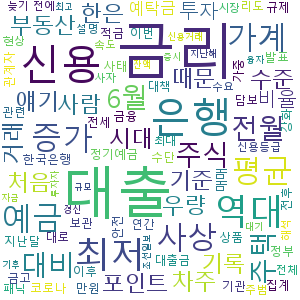

In [29]:
#워드클라우드 시각화
wordcloud = WordCloud(
    max_font_size=60, 
    width=300,
    height=300,
    relative_scaling='auto', 
    font_path=FONT_PATH, 
    background_color='white')
wordcloud.generate_from_frequencies(c) 
wordcloud.to_image()

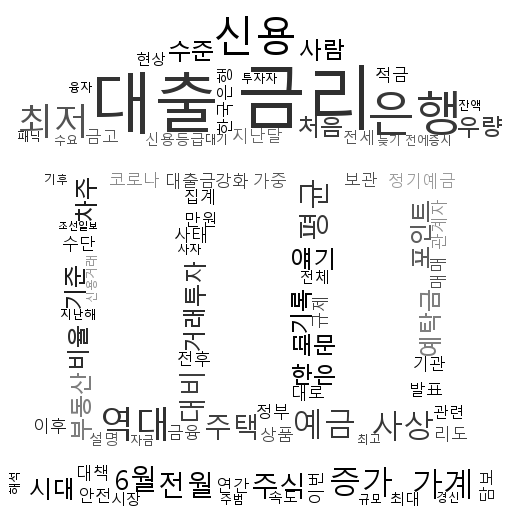

In [31]:
#워드클라우드 원하는 이미지 파일로 실루엣 설정하여 시각화
from wordcloud import ImageColorGenerator

img = plt.imread("./bank-building.jpg")

wordcloud1 = WordCloud(
        font_path=FONT_PATH,
        background_color="white",
        random_state=1,
        color_func=ImageColorGenerator(img),        
        mask=img
)
wordcloud1.generate_from_frequencies(c)
wordcloud1.to_image()

## 미등록 단어 문제 해결

In [34]:
#미등록 단어 문제 해결 : dictionary 설정하기
from ckonlpy.tag import Twitter
twitter = Twitter()

In [46]:
import konlpy
komoran2 = konlpy.tag.Komoran(userdic='dict_과제.txt')

#원하는 단어들로 넣어주시면 될듯 해요

In [45]:
print(komoran2.pos(filtered_content))

[('대출금', 'NNG'), ('리도', 'NNP'), ('2', 'SN'), ('72', 'SN'), ('사상', 'NNG'), ('최저', 'NNG'), ('은행', 'NNG'), ('예금', 'NNG'), ('에', 'JKB'), ('사상', 'NNG'), ('첫', 'MM'), ('0', 'SN'), ('대', 'NNB'), ('금리', 'NNG'), ('시대', 'NNG'), ('가', 'JKS'), ('열리', 'VV'), ('었', 'EP'), ('다', 'EC'), ('1', 'SN'), ('억', 'NR'), ('원', 'NNB'), ('을', 'JKO'), ('은행', 'NNG'), ('에', 'JKB'), ('예금', 'NNG'), ('하', 'XSV'), ('아', 'EC'), ('보', 'VX'), ('았', 'EP'), ('자', 'EC'), ('연간', 'NNG'), ('100', 'SN'), ('만원', 'NNP'), ('받', 'VV'), ('기', 'ETN'), ('도', 'JX'), ('어렵', 'VA'), ('다는', 'ETM'), ('얘기', 'NNG'), ('다', 'JX'), ('은행', 'NNG'), ('예', 'NNG'), ('적금', 'NNP'), ('이', 'JKS'), ('돈', 'NNG'), ('을', 'JKO'), ('불리', 'VV'), ('는', 'ETM'), ('수단', 'NNG'), ('이', 'JKS'), ('아니', 'VCN'), ('ㄴ', 'ETM'), ('있', 'VV'), ('는', 'ETM'), ('돈', 'NNG'), ('을', 'JKO'), ('그저', 'MAG'), ('안전', 'NNG'), ('하', 'XSV'), ('게', 'EC'), ('보관', 'NNG'), ('하', 'XSV'), ('는', 'ETM'), ('금고', 'NNP'), ('에', 'JKB'), ('그치', 'VV'), ('는', 'ETM'), ('시대', 'NNG'), ('가', 'JKS'), ('되', 'VV

## 네트워크 시각화

In [47]:
import networkx as nx
import matplotlib.pyplot as plt

In [48]:
selected_words = list([word for word, pos in frequent])

selected_words

['금리', '대출', '은행', '신용', '최저', '역대', '사상', '예금', '평균', '가계']

In [49]:
import itertools


# 전체 텍스트에서 문장단위로 구분한 단어 추출
def get_sentences(content):
    text1 = re.sub(r'[^\.\?\!\s\w\d]', ' ', content)
    text1 = re.sub(r'([\.\?\!])', r'\1 ', text1)
    sentences = re.split(r'[\.\?\!]\s+', text1)
    komoran = konlpy.tag.Komoran()
    sentences = [komoran.nouns(sentence) for sentence in sentences if len(sentence)>0]
    return sentences



def add_ties(g, sentence):
#각 문장에 대해서, 각 문장에서 함께 사용되는 단어들 사이에 관계 형성하기

    if len(sentence) > 0 :

        selected_words=list(g.nodes())

        for pair in list(itertools.combinations(set(sentence), 2)):
            if pair[0] == pair[1]:
                continue
            if pair[0] in selected_words and pair[1] in selected_words:
                if pair in list(g.edges()) or (pair[1],pair[0]) in list(g.edges()): 
                    g[pair[0]][pair[1]]['weight'] += 1
                else:
                    g.add_edge(pair[0], pair[1], weight=1 )
        return g
    else:
        return g


    
def form_network(g, sentences):
#원본 데이터와 가장 많이 출현하는 명사 단어 x개를 사용해서 그 단어들 사이의 관계 형성하기
    for sentence in sentences:
        g = add_ties(g, sentence)
        
    return g


def do_kr_sna(sentences, selected_words):
    G = nx.Graph()
    G.add_nodes_from(selected_words)
    G = form_network(G, sentences)
    
    return G

In [50]:
sentences = get_sentences(text_join)
g = do_kr_sna(sentences, selected_words)

In [51]:
x = nx.degree_centrality(g)
sorted(x.items(), key = lambda kv: kv[1], reverse=True)

[('금리', 1.0),
 ('대출', 0.7777777777777777),
 ('은행', 0.7777777777777777),
 ('최저', 0.6666666666666666),
 ('예금', 0.5555555555555556),
 ('사상', 0.4444444444444444),
 ('평균', 0.4444444444444444),
 ('역대', 0.3333333333333333),
 ('가계', 0.3333333333333333),
 ('신용', 0.2222222222222222)]

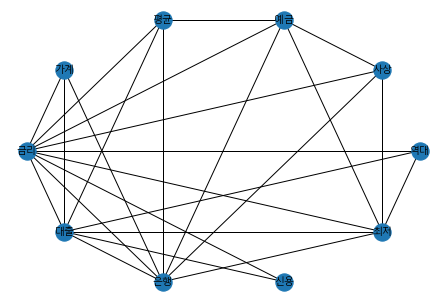

In [52]:
#networkx로 시각화
import matplotlib.font_manager as fm
font_name = 'Malgun Gothic'
pos = nx.shell_layout(g)
nx.draw(g, pos)
nx.draw_networkx_labels(g, pos, font_family = font_name, font_size=10)

plt.show()